## Simulating the eBOSS Instrument

This notebook goes through how to simulate eBOSS spectra for a given. The model used here is defined so that it has an AB magnitude of 20 in each SDSS filter.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import specsim.simulator

from astropy.io import fits
from astropy.table import Table, vstack

#### Simulate a source model

In [3]:
import speclite
import astropy.units as u

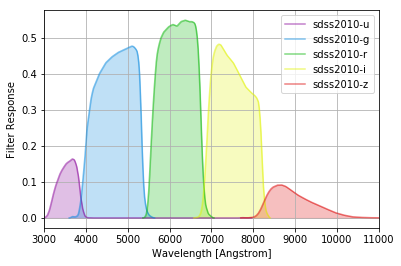

In [4]:
sdss = speclite.filters.load_filters('sdss2010-*')
speclite.filters.plot_filters(sdss, wavelength_limits=(3000, 11000))

#### Compare specsim output in DESI and eBOSS modes

##### Initialize each simulator

In [5]:
desi = specsim.simulator.Simulator('desi', num_fibers=1, camera_output=True)
eboss = specsim.simulator.Simulator('eboss', num_fibers=1, camera_output=True)

/Users/belaabolfathi/anaconda3/lib/python3.5/site-packages/speclite/filters.py:1466: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values_no_units = values_no_units[values_slice]
/Users/belaabolfathi/anaconda3/lib/python3.5/site-packages/speclite/filters.py:1466: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values_no_units = values_no_units[values_slice]


##### Get simulated output for each camera

In [9]:
def get_camera_output(simulator, seed=123):
    gen = np.random.RandomState(seed)
    simulator.simulate()
    simulator.generate_random_noise(gen)
    sim = simulator.simulated
    cam1 = simulator.camera_output[0]
    cam2 = simulator.camera_output[1]
    
    return(simulator.camera_output)
    
desi_cam1, desi_cam2, desi_cam3 = get_camera_output(desi)
eboss_cam1, eboss_cam2 = get_camera_output(eboss)

/Users/belaabolfathi/desi/code/specsim/specsim/simulator.py:606: RuntimeWarning: invalid value encountered in less
  random_state.poisson(mean_electrons) - mean_electrons +
/Users/belaabolfathi/desi/code/specsim/specsim/simulator.py:606: RuntimeWarning: invalid value encountered in greater
  random_state.poisson(mean_electrons) - mean_electrons +


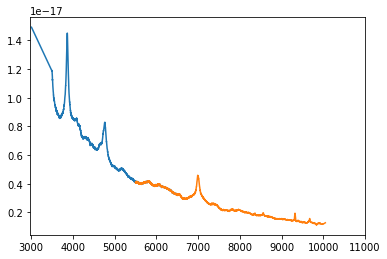

In [8]:
plt.plot(eboss_cam1['wavelength'], eboss_cam1['observed_flux'])
plt.plot(eboss_cam2['wavelength'], eboss_cam2['observed_flux'])
plt.xlim(2980, 11000)
plt.show()

##### Plot DESI and eBOSS simulated inverse variance

In [16]:
qso_model = Table.read('../../specsim/data/sdss/spec-qso.dat', format='ascii')
wlen = qso_model['WAVELENGTH']
flux = qso_model['FLUX']

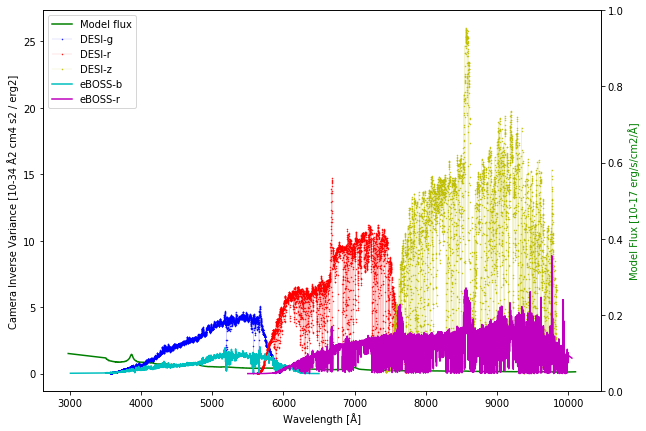

In [17]:
fig, ax1 = plt.subplots(figsize=(10,7))

ax2 = ax1.twinx()
ax1.plot(wlen, flux, 'g', label='Model flux') # 1e-17 erg/s/cm2/A
ax1.plot(desi_cam1['wavelength'], desi_cam1['flux_inverse_variance'] * 1e-34, 'b.-', ms=1, lw=0.1, label='DESI-g') # 1e34 A2 cm4 s2 / erg2
ax1.plot(desi_cam2['wavelength'], desi_cam2['flux_inverse_variance'] * 1e-34, 'r.-',  ms=1, lw=0.1, label='DESI-r') # 1e34 A2 cm4 s2 / erg2
ax1.plot(desi_cam3['wavelength'], desi_cam3['flux_inverse_variance'] * 1e-34, 'y.-',  ms=1, lw=0.1, label='DESI-z') # 1e34 A2 cm4 s2 / erg2
ax1.plot(eboss_cam1['wavelength'], eboss_cam1['flux_inverse_variance'] * 1e-34, 'c', label='eBOSS-b') # 1e34 A2 cm4 s2 / erg2
ax1.plot(eboss_cam2['wavelength'], eboss_cam2['flux_inverse_variance'] * 1e-34, 'm', label='eBOSS-r') # 1e34 A2 cm4 s2 / erg2

ax1.legend(loc=2)
ax1.set_xlabel('Wavelength [Å]')
ax1.set_ylabel('Camera Inverse Variance [10-34 Å2 cm4 s2 / erg2]', color='k')
ax2.set_ylabel('Model Flux [10-17 erg/s/cm2/Å]', color='g')
plt.show()